#Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning
Miguel Ángel Pérez López A01750145

# Importamos las librerías

In [1]:
import keras
import numpy as np
import pandas as pd
from keras import regularizers
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
%matplotlib inline

# Cargar el dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


# Los labels son:
0	airplane \
1	automobile \
2	bird \
3	cat \
4	deer \
5	dog \
6	frog \
7	horse \
8	ship \
9	truck \

Validamos que el shape del dataset sea correcto

In [3]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


# Separamos el dataset de train en train y validation

In [4]:
from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=.3)

Verificamos que las dimensiones sean correctas

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(validation_images.shape)
print(validation_labels.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


In [6]:
# Convertimos las imágenes a tipo float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
validation_images = validation_images.astype('float32')

# Dividimos entre 255 para que los valores estén entre 0 y 1
train_images = train_images / 255
test_images = test_images / 255 
validation_images = validation_images / 255

# Le aplicamos one hot encoding a los labels
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
validation_labels = np_utils.to_categorical(validation_labels, num_classes)

# Definimos las capas de la red

1er iteración \
Para esta iteración incluí varias capas de maxpooling, en este caso ya no se podías poner más de esas porque las dimensiones se reducirían a menos de 1 y eso es un error. \

Esta primera iteración sólo fue para probar una red convolucional básica

In [7]:
model  = Sequential([
  Conv2D(256, kernel_size=4, padding='same', activation="relu", input_shape=train_images[0].shape),
  MaxPooling2D((2, 2)),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(64, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(64, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  
  Flatten(),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       12544     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        73760     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [8]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1094/1094 [==============================] - 20s 10ms/step - loss: 1.7168 - accuracy: 0.3642 - val_loss: 1.4031 - val_accuracy: 0.4908
Epoch 2/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.3529 - accuracy: 0.5078 - val_loss: 1.2715 - val_accuracy: 0.5379
Epoch 3/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.2041 - accuracy: 0.5677 - val_loss: 1.1504 - val_accuracy: 0.5847
Epoch 4/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.1087 - accuracy: 0.6048 - val_loss: 1.1216 - val_accuracy: 0.6030
Epoch 5/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.0307 - accuracy: 0.6325 - val_loss: 1.0669 - val_accuracy: 0.6253
Epoch 6/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.9607 - accuracy: 0.6555 - val_loss: 1.0185 - val_accuracy: 0.6381
Epoch 7/10
1094/1094 [==============================] - 11s 10ms/step - loss: 0.9155 - accuracy: 0.6755 - val_loss: 0.9938 - 

El accuracy es decente pero el validation accuracy es muy bajo. \
Un incremento de capas puede hacer que mejore.

2da iteración
Agregué más capas convolucionales para ayudar a la red a que detecte más patrones. \
Además agregué capas después del Flatten para que la red sea más profunda.


In [10]:
model  = Sequential([
  Conv2D(256, kernel_size=4, padding='same', activation="relu", input_shape=train_images[0].shape),
  MaxPooling2D((2, 2)),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  Conv2D(32, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(64, (3,3), padding='same', activation='relu'),
  Conv2D(64, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=2),
  Conv2D(8, (3,3), padding='same', activation="relu"),
  MaxPooling2D(pool_size=2),
  
  Flatten(),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       12544     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        73760     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)         

In [11]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1094/1094 [==============================] - 13s 11ms/step - loss: 2.0072 - accuracy: 0.2406 - val_loss: 1.7397 - val_accuracy: 0.3465
Epoch 2/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.6866 - accuracy: 0.3657 - val_loss: 1.5812 - val_accuracy: 0.4097
Epoch 3/10
1094/1094 [==============================] - 10s 10ms/step - loss: 1.5452 - accuracy: 0.4249 - val_loss: 1.4926 - val_accuracy: 0.4411
Epoch 4/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.4430 - accuracy: 0.4646 - val_loss: 1.3511 - val_accuracy: 0.5045
Epoch 5/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.3591 - accuracy: 0.5012 - val_loss: 1.3042 - val_accuracy: 0.5201
Epoch 6/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.2886 - accuracy: 0.5293 - val_loss: 1.2588 - val_accuracy: 0.5369
Epoch 7/10
1094/1094 [==============================] - 12s 11ms/step - loss: 1.2334 - accuracy: 0.5552 - val_loss: 1.2249 -

El accuracy del conjunto de validación es muy bajo y el error fue demasiado alto, incluso mayor que la primer iteración. \
Después de correrlo varias veces se infiere que es por la red y no por los pesos aleatorios.

3ra iteración

Agregué más capas de convolución y reduje la cantidad de capas después del Flatten

In [13]:
model  = Sequential([
    Conv2D(64, (3, 3), padding='same', activation="relu", input_shape=train_images[0].shape),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    
    Conv2D(8, (3,3), padding='same', activation="relu"),
    Conv2D(8, (3,3), padding='same', activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)       

Compilamos el modelo

In [14]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Corremos el modelo final

In [15]:
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(validation_images, validation_labels))

Epoch 1/25
1094/1094 [==============================] - 15s 12ms/step - loss: 1.7530 - accuracy: 0.3271 - val_loss: 1.5992 - val_accuracy: 0.4075
Epoch 2/25
1094/1094 [==============================] - 12s 11ms/step - loss: 1.4227 - accuracy: 0.4755 - val_loss: 1.2556 - val_accuracy: 0.5353
Epoch 3/25
1094/1094 [==============================] - 12s 11ms/step - loss: 1.2389 - accuracy: 0.5528 - val_loss: 1.2513 - val_accuracy: 0.5489
Epoch 4/25
1094/1094 [==============================] - 13s 12ms/step - loss: 1.1288 - accuracy: 0.5948 - val_loss: 1.2056 - val_accuracy: 0.5649
Epoch 5/25
1094/1094 [==============================] - 12s 11ms/step - loss: 1.0558 - accuracy: 0.6218 - val_loss: 1.2965 - val_accuracy: 0.5463
Epoch 6/25
1094/1094 [==============================] - 13s 12ms/step - loss: 1.0040 - accuracy: 0.6430 - val_loss: 1.2652 - val_accuracy: 0.5679
Epoch 7/25
1094/1094 [==============================] - 13s 12ms/step - loss: 0.9524 - accuracy: 0.6632 - val_loss: 1.0469 -

In [16]:
# Cargamos el history del modelo en un dataframe
frame = pd.DataFrame(history.history)

In [17]:
frame

,loss,accuracy,val_loss,val_accuracy
0,1.752968,0.327057,1.599249,0.407533
1,1.422660,0.475543,1.255614,0.535333
2,1.238943,0.552829,1.251327,0.548933
3,1.128783,0.594829,1.205605,0.564867
4,1.055759,0.621800,1.296467,0.546267
5,1.004048,0.643029,1.265186,0.567867
6,0.952427,0.663229,1.046890,0.634733
7,0.913486,0.677543,0.981854,0.645400
8,0.881169,0.688886,0.901272,0.676067
9,0.843193,0.707771,1.075083,0.628467


Como se puede observar la 3ra iteración tuvo el mejor accuracy con un loss menor.

# Accuracy vs Epochs

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

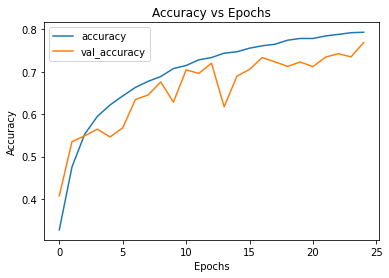

In [19]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y=["accuracy", "val_accuracy"], title="Accuracy vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

# Loss vs Epochs

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

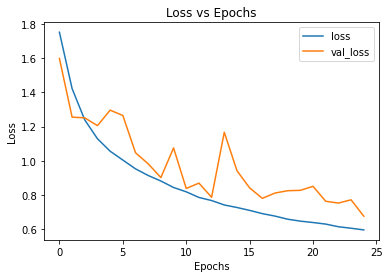

In [20]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y=["loss", "val_loss"], title = "Loss vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

# Evaluamos el modelo

In [21]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    loss, accuracy = model.evaluate(scaled_test_images, test_labels)
    return (loss, accuracy)

In [22]:
test_loss, test_accuracy = evaluate_model(model, test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.6903 - accuracy: 0.7677
Test loss: 0.6903119087219238
Test accuracy: 0.7677000164985657


# Predicciones

1/1 [==============================] - 0s 299ms/step


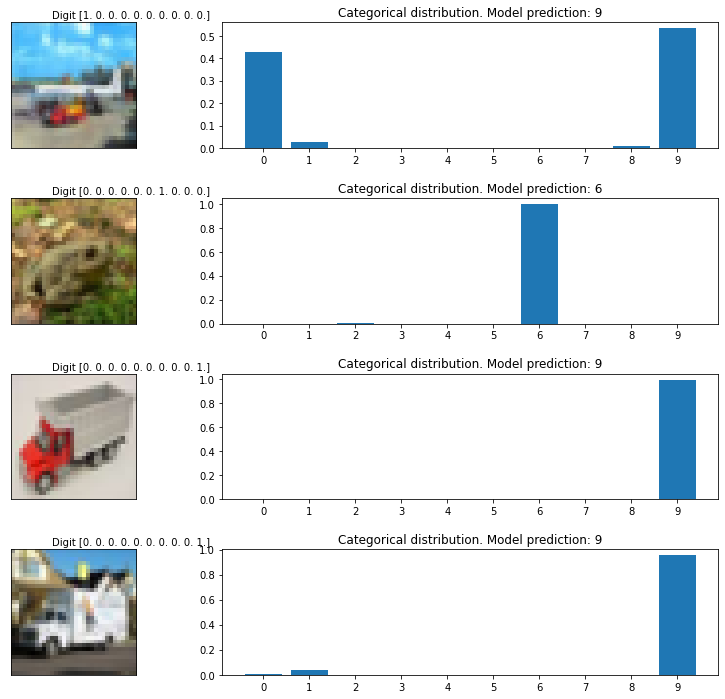

In [23]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()